# Jet Rail - Time Series forecasting

### Load the dataset into panda's dataframe


In [152]:
import pandas as pd

In [153]:
data=pd.read_csv("train.csv")

### Compute the difference between data

In [154]:
data.head()

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


In [155]:
data['Datetime']=pd.to_datetime(data['Datetime'],format='%d-%m-%Y %H:%M')
data.head()

,ID,Datetime,Count
0,0,2012-08-25 00:00:00,8
1,1,2012-08-25 01:00:00,2
2,2,2012-08-25 02:00:00,6
3,3,2012-08-25 03:00:00,2
4,4,2012-08-25 04:00:00,2


In [72]:
data.Datetime.diff()

0            NaT
1       01:00:00
2       01:00:00
3       01:00:00
4       01:00:00
5       01:00:00
6       01:00:00
7       01:00:00
8       01:00:00
9       01:00:00
10      01:00:00
11      01:00:00
12      01:00:00
13      01:00:00
14      01:00:00
15      01:00:00
16      01:00:00
17      01:00:00
18      01:00:00
19      01:00:00
20      01:00:00
21      01:00:00
22      01:00:00
23      01:00:00
24      01:00:00
25      01:00:00
26      01:00:00
27      01:00:00
28      01:00:00
29      01:00:00
          ...   
18258   01:00:00
18259   01:00:00
18260   01:00:00
18261   01:00:00
18262   01:00:00
18263   01:00:00
18264   01:00:00
18265   01:00:00
18266   01:00:00
18267   01:00:00
18268   01:00:00
18269   01:00:00
18270   01:00:00
18271   01:00:00
18272   01:00:00
18273   01:00:00
18274   01:00:00
18275   01:00:00
18276   01:00:00
18277   01:00:00
18278   01:00:00
18279   01:00:00
18280   01:00:00
18281   01:00:00
18282   01:00:00
18283   01:00:00
18284   01:00:00
18285   01:00:

In [73]:
data=data.set_index(data['Datetime'])
data.head()

,ID,Datetime,Count
Datetime,,,
2012-08-25 00:00:00,0,2012-08-25 00:00:00,8
2012-08-25 01:00:00,1,2012-08-25 01:00:00,2
2012-08-25 02:00:00,2,2012-08-25 02:00:00,6
2012-08-25 03:00:00,3,2012-08-25 03:00:00,2
2012-08-25 04:00:00,4,2012-08-25 04:00:00,2


In [74]:
import matplotlib.pyplot as plt

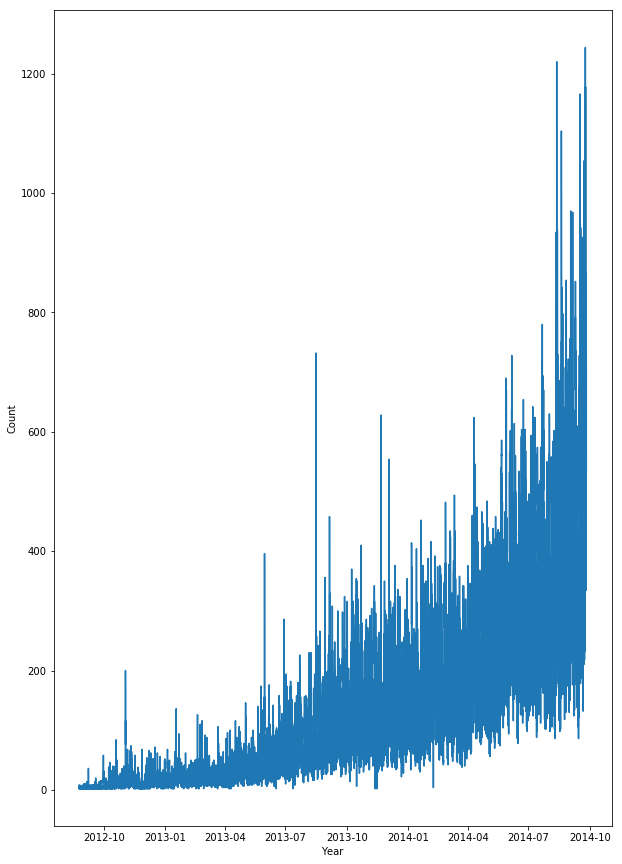

In [75]:
plt.figure(figsize=(10,15))
plt.xlabel('Year')
plt.ylabel('Count')
plt.plot(data.Count)
plt.show()

In [76]:
yearly_data=data.resample('A').sum()

In [77]:
yearly_data

,ID,Count
Datetime,,
2012-12-31,4791060,34932
2013-12-31,65485380,685968
2014-12-31,96939888,1820366


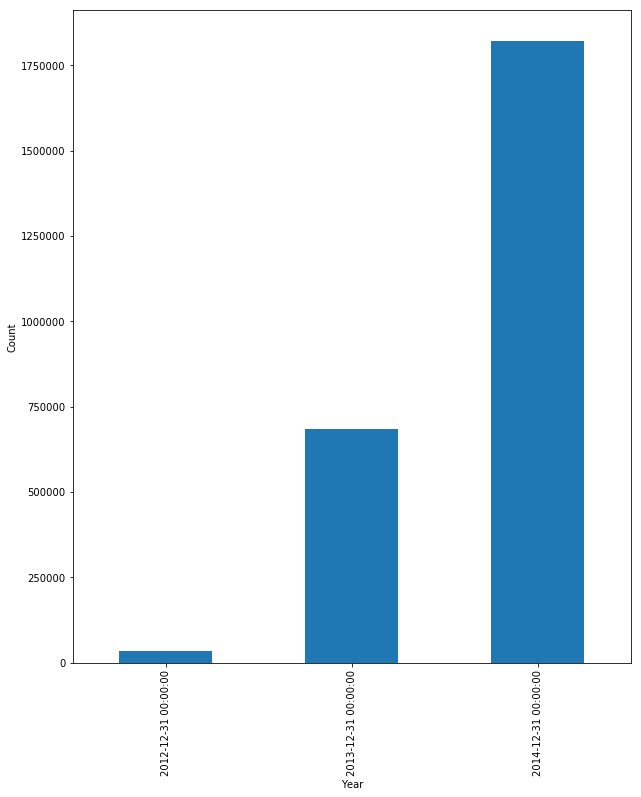

In [78]:
plt.figure(figsize=(10,12))
yearly_data.Count.plot.bar()
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

In [79]:
monthly_data=data.resample('M').sum()


In [80]:
monthly_data=data.groupby(data.index.month).sum()
monthly_data

,ID,Count
Datetime,,
1,11677080,138112
2,11498592,149448
3,13784088,154442
4,14393520,198260
5,15962520,230722
6,16501680,268882
7,18140952,311098
8,19262052,365144
9,17859300,371196


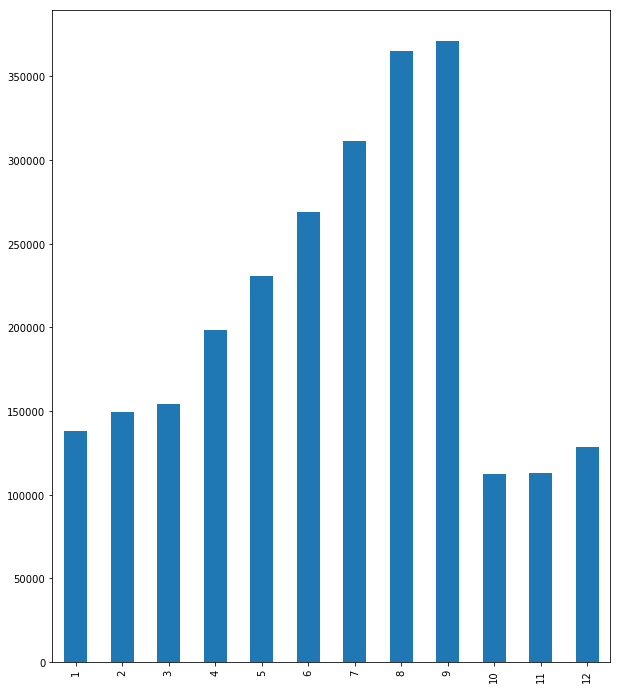

In [81]:
plt.figure(figsize=(10,12))
monthly_data.Count.plot.bar()
plt.xlabel('')
plt.ylabel('')
plt.show()

### Exploratory Data Analysis

In [82]:
daily_data=data.resample('D').sum()
daily_data.head()

,ID,Count
Datetime,,
2012-08-25,276,76
2012-08-26,852,88
2012-08-27,1428,62
2012-08-28,2004,58
2012-08-29,2580,60


In [83]:
daily_data=data.groupby(data.index.weekday).sum()
daily_data

,ID,Count
Datetime,,
0,23888004,412916
1,23950788,430988
2,24013572,427022
3,24076356,407250
4,23699952,375122
5,23762436,251292
6,23825220,236676


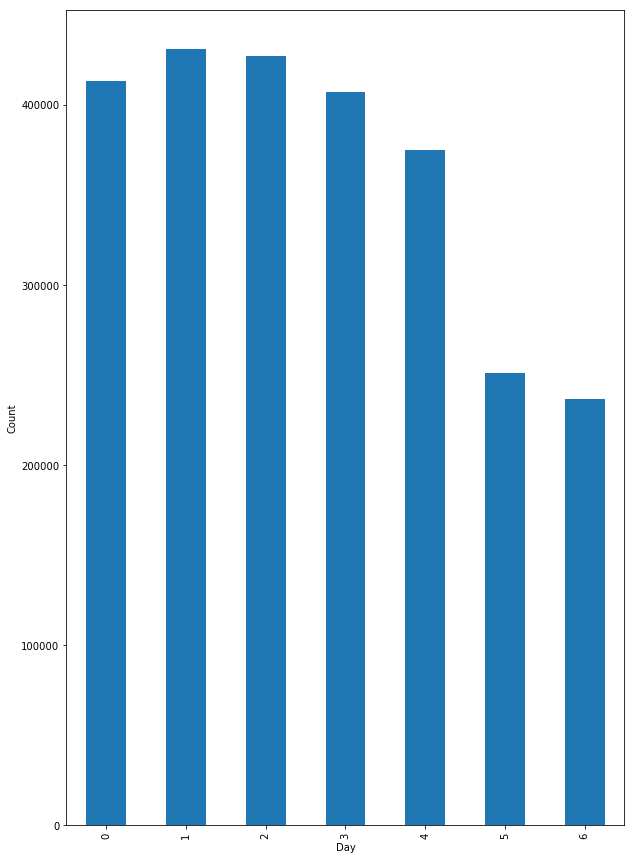

In [84]:
plt.figure(figsize=(10,15))
daily_data.Count.plot.bar()
plt.xlabel('Day')
plt.ylabel('Count')
plt.show()

In [85]:
weekday_name=data.groupby(data.index.weekday_name).sum()
weekday_name

,ID,Count
Datetime,,
Friday,23699952,375122
Monday,23888004,412916
Saturday,23762436,251292
Sunday,23825220,236676
Thursday,24076356,407250
Tuesday,23950788,430988
Wednesday,24013572,427022


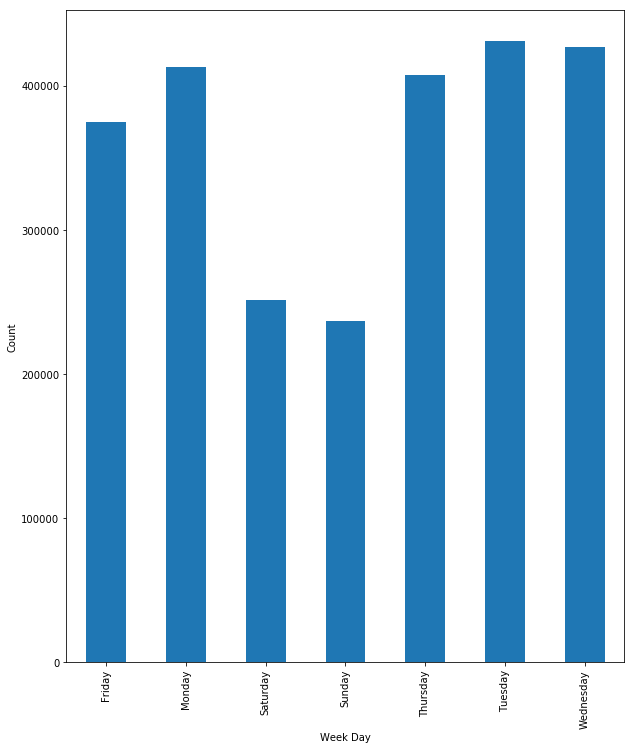

In [86]:
plt.figure(figsize=(10,12))
weekday_name.Count.plot.bar()
plt.xlabel('Week Day')
plt.ylabel('Count')
plt.show()

In [87]:
hourly_data=data.resample('H').sum()

In [88]:
hourly_data

,ID,Count
Datetime,,
2012-08-25 00:00:00,0,8
2012-08-25 01:00:00,1,2
2012-08-25 02:00:00,2,6
2012-08-25 03:00:00,3,2
2012-08-25 04:00:00,4,2
2012-08-25 05:00:00,5,2
2012-08-25 06:00:00,6,2
2012-08-25 07:00:00,7,2
2012-08-25 08:00:00,8,6


In [89]:
hourly_data=data.groupby(data.index.hour).sum()
hourly_data

,ID,Count
Datetime,,
0,6958584,112544
1,6959346,89816
2,6960108,76012
3,6960870,62806
4,6961632,52864
5,6962394,47322
6,6963156,50884
7,6963918,59012
8,6964680,67956


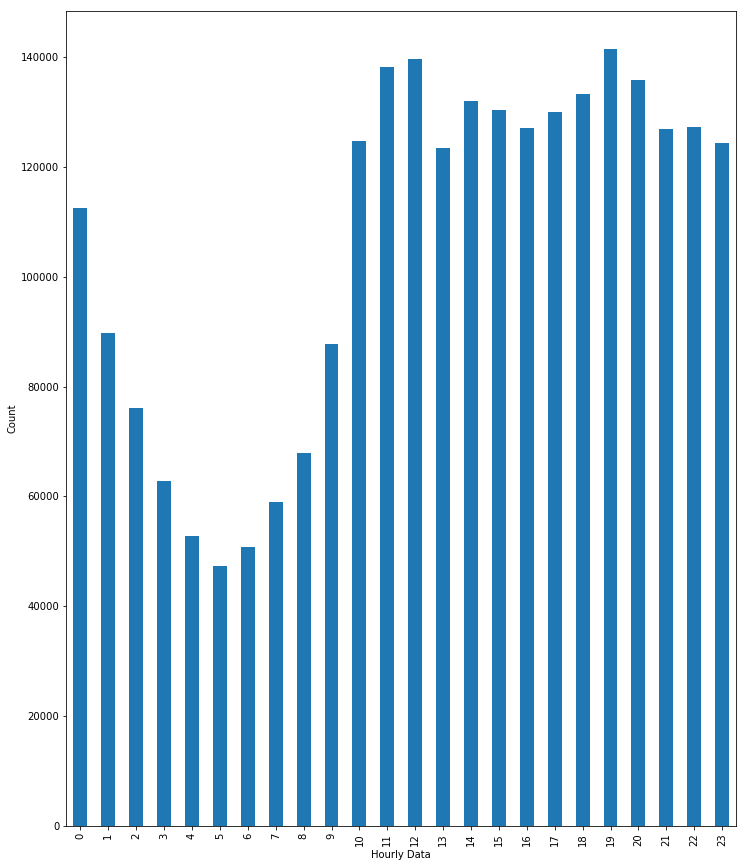

In [90]:
plt.figure(figsize=(12,15))
hourly_data.Count.plot.bar()
plt.xlabel('Hourly Data')
plt.ylabel('Count')
plt.show()

In [91]:
daily_data=data.resample('D').mean()

In [92]:
daily_data.head()

,ID,Count
Datetime,,
2012-08-25,11.5,3.166667
2012-08-26,35.5,3.666667
2012-08-27,59.5,2.583333
2012-08-28,83.5,2.416667
2012-08-29,107.5,2.500000


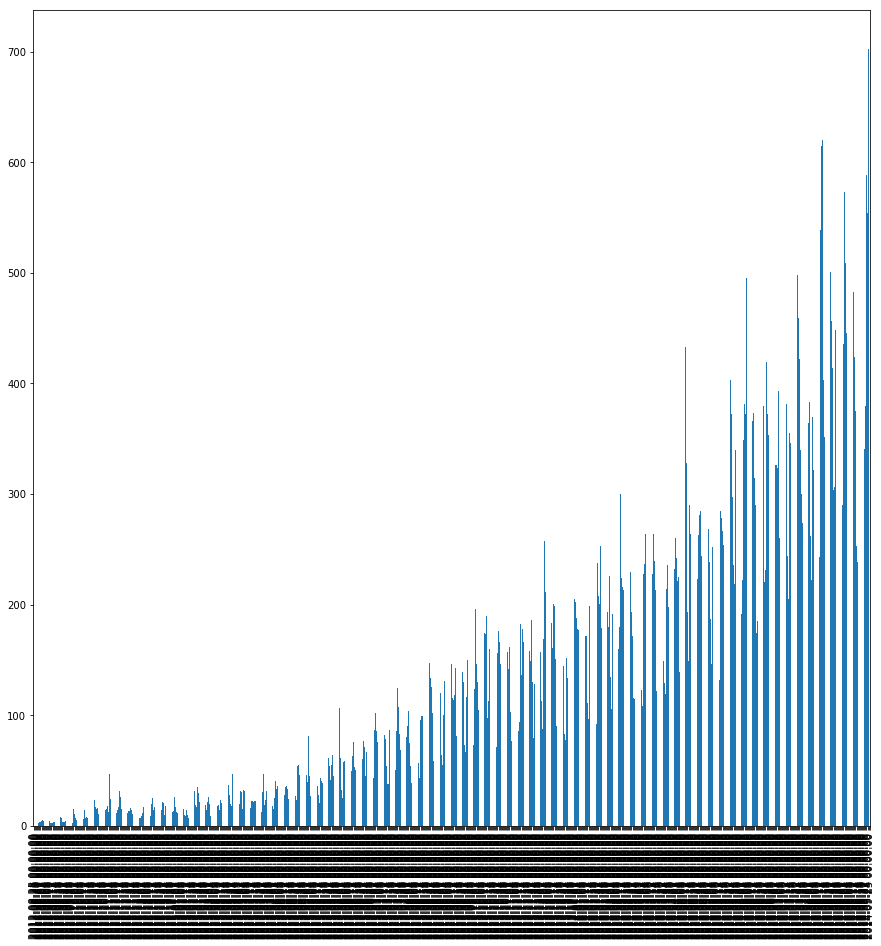

In [93]:
plt.figure(figsize=(15,15))
daily_data.Count.plot.bar()
plt.xlabel('')
plt.show()

In [94]:
training_data=daily_data.loc[:'2014-06-24']

In [95]:
validation_data=daily_data.loc['2014-06-25':]

In [96]:
training_data.tail()

,ID,Count
Datetime,,
2014-06-20,15947.5,379.916667
2014-06-21,15971.5,220.083333
2014-06-22,15995.5,230.833333
2014-06-23,16019.5,419.416667
2014-06-24,16043.5,372.166667


In [97]:
validation_data.head()

,ID,Count
Datetime,,
2014-06-25,16067.5,353.666667
2014-06-26,16091.5,395.250000
2014-06-27,16115.5,282.333333
2014-06-28,16139.5,218.250000
2014-06-29,16163.5,196.250000


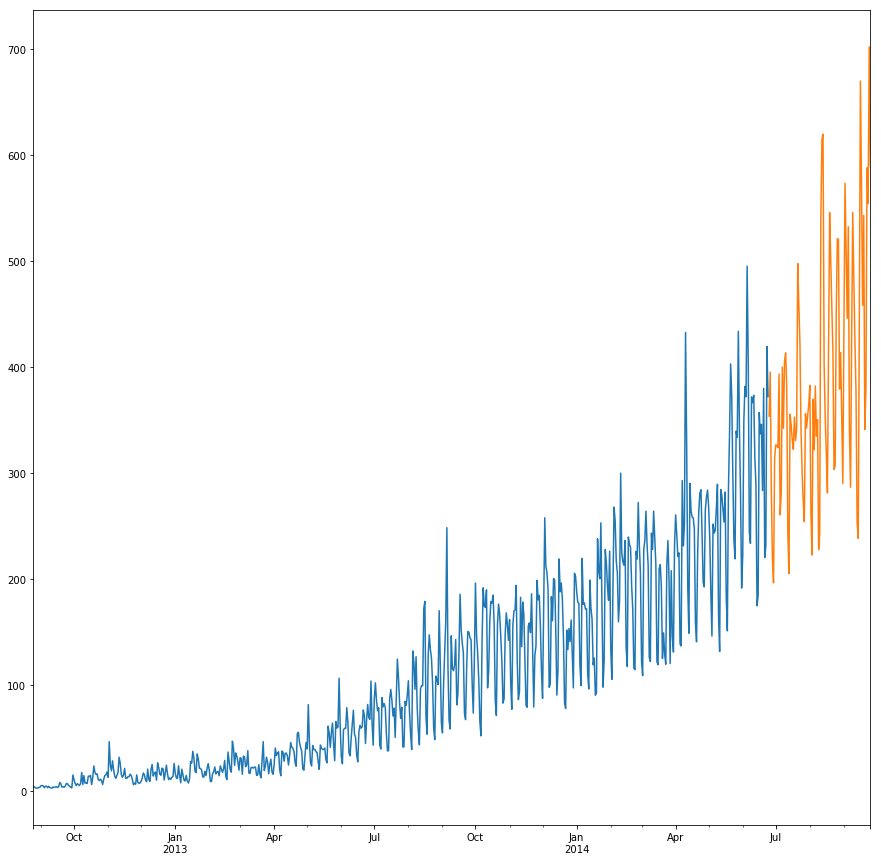

In [98]:
plt.figure(figsize=(15,15))
training_data.Count.plot()
validation_data.Count.plot()
plt.xlabel('')
plt.ylabel('')
plt.show()

In [99]:
from IPython.display import Image
Image("Trend-Seasonality-Additive-Multiplicative.png")

In [100]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [101]:
termse = seasonal_decompose(daily_data.Count, model='additive')

In [102]:
termse.observed

Datetime
2012-08-25      3.166667
2012-08-26      3.666667
2012-08-27      2.583333
2012-08-28      2.416667
2012-08-29      2.500000
2012-08-30      3.083333
2012-08-31      3.250000
2012-09-01      4.666667
2012-09-02      4.916667
2012-09-03      4.500000
2012-09-04      2.750000
2012-09-05      4.333333
2012-09-06      4.166667
2012-09-07      2.833333
2012-09-08      4.166667
2012-09-09      2.833333
2012-09-10      2.666667
2012-09-11      2.416667
2012-09-12      3.500000
2012-09-13      3.000000
2012-09-14      3.500000
2012-09-15      3.833333
2012-09-16      2.916667
2012-09-17      3.833333
2012-09-18      7.833333
2012-09-19      6.583333
2012-09-20      3.500000
2012-09-21      3.750000
2012-09-22      3.250000
2012-09-23      4.250000
                 ...    
2014-08-27    520.666667
2014-08-28    379.250000
2014-08-29    413.750000
2014-08-30    352.583333
2014-08-31    290.166667
2014-09-01    436.000000
2014-09-02    573.500000
2014-09-03    509.000000
2014-09-04    44

In [103]:
print('The Level in the dataset is given by :',termse.observed)
print('The Trend in the dataset is given by :',termse.trend)
print('The Seasonality in the dataset is given by :',termse.seasonal)
print('The Noise in the dataset is given by :',termse.resid)


The Level in the dataset is given by : Datetime
2012-08-25      3.166667
2012-08-26      3.666667
2012-08-27      2.583333
2012-08-28      2.416667
2012-08-29      2.500000
2012-08-30      3.083333
2012-08-31      3.250000
2012-09-01      4.666667
2012-09-02      4.916667
2012-09-03      4.500000
2012-09-04      2.750000
2012-09-05      4.333333
2012-09-06      4.166667
2012-09-07      2.833333
2012-09-08      4.166667
2012-09-09      2.833333
2012-09-10      2.666667
2012-09-11      2.416667
2012-09-12      3.500000
2012-09-13      3.000000
2012-09-14      3.500000
2012-09-15      3.833333
2012-09-16      2.916667
2012-09-17      3.833333
2012-09-18      7.833333
2012-09-19      6.583333
2012-09-20      3.500000
2012-09-21      3.750000
2012-09-22      3.250000
2012-09-23      4.250000
                 ...    
2014-08-27    520.666667
2014-08-28    379.250000
2014-08-29    413.750000
2014-08-30    352.583333
2014-08-31    290.166667
2014-09-01    436.000000
2014-09-02    573.500000
20

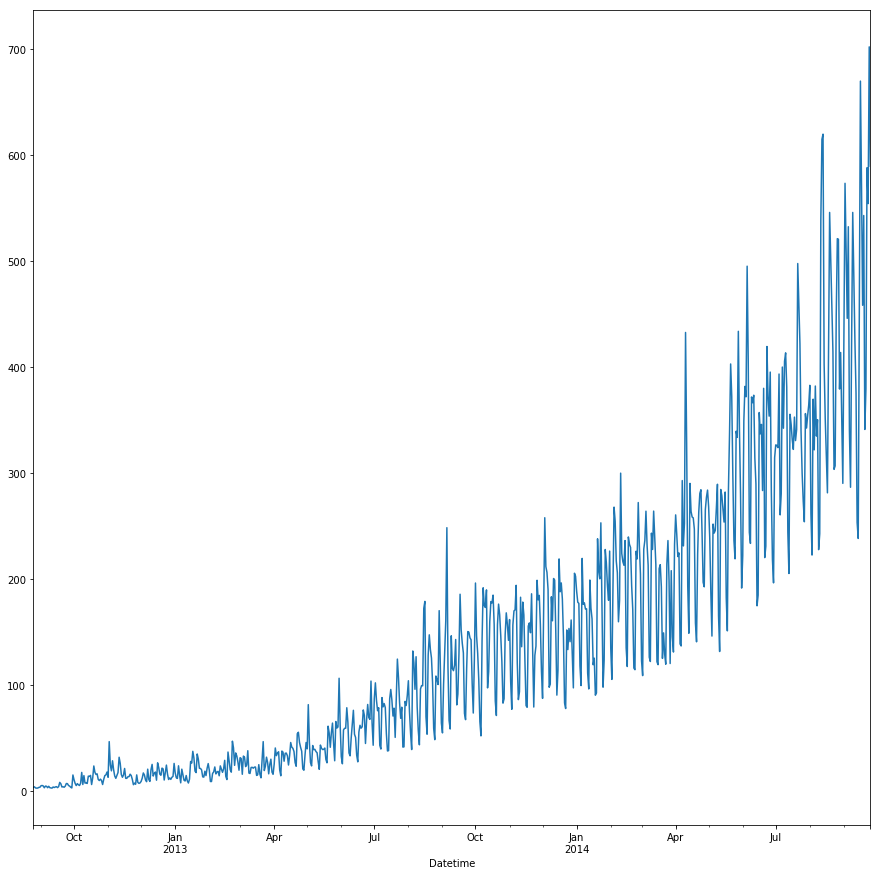

In [104]:
plt.figure(figsize=(15,15))
termse.observed.plot()
plt.show()

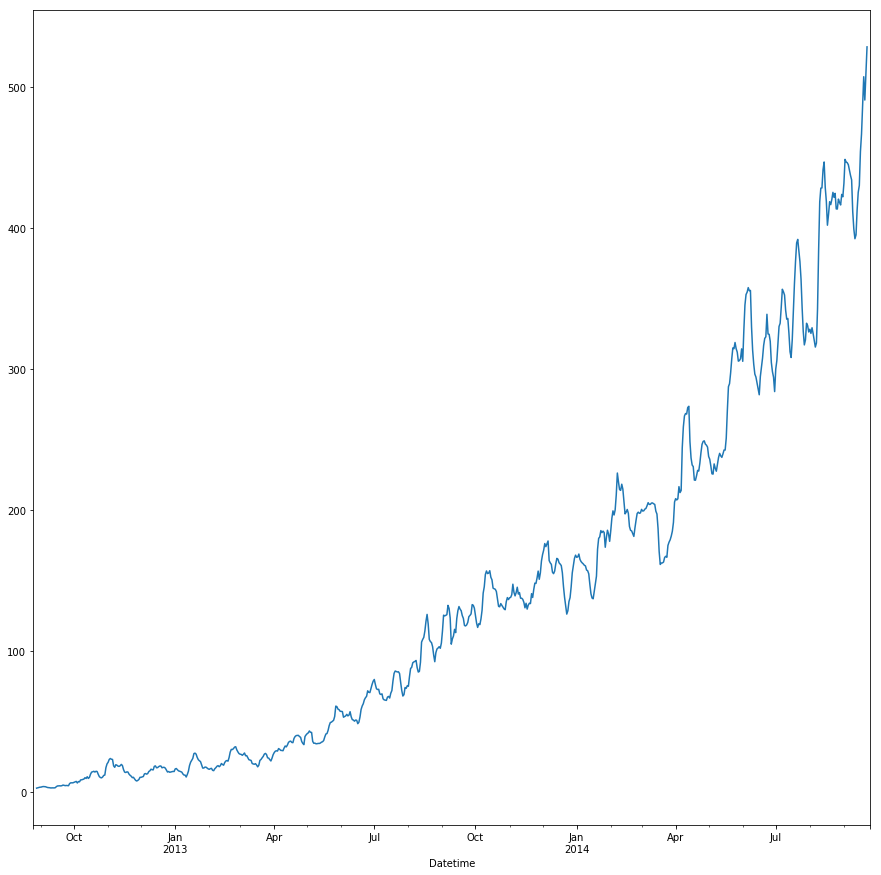

In [105]:
plt.figure(figsize=(15,15))
termse.trend.plot()
plt.show()

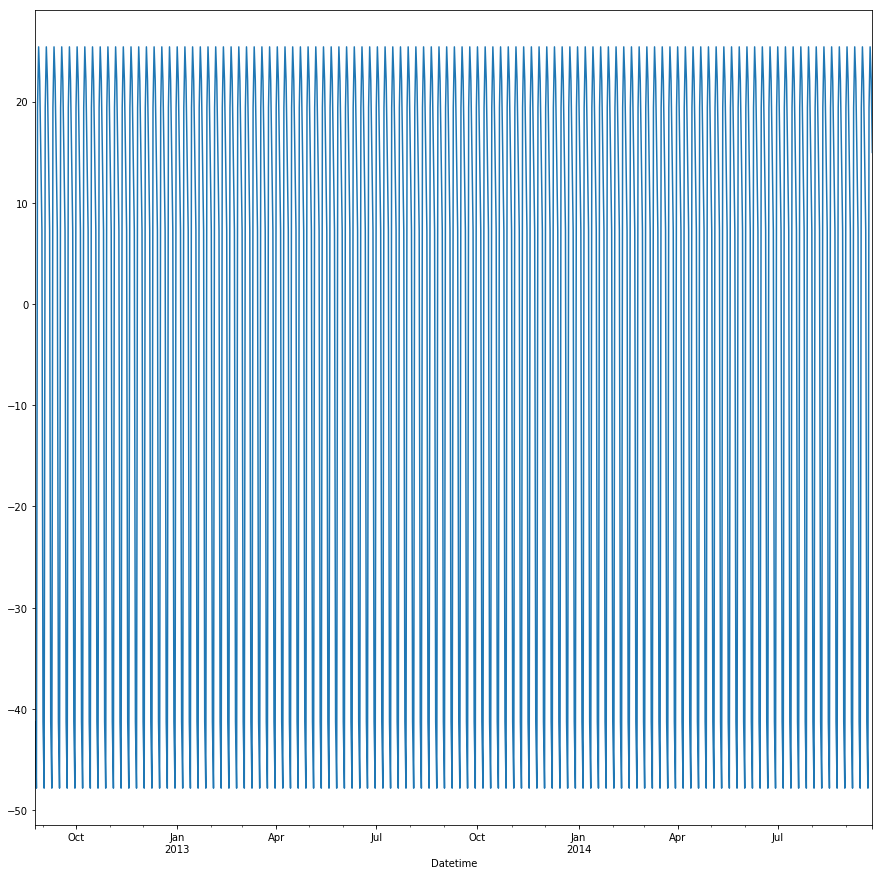

In [106]:
plt.figure(figsize=(15,15))
termse.seasonal.plot()
plt.show()

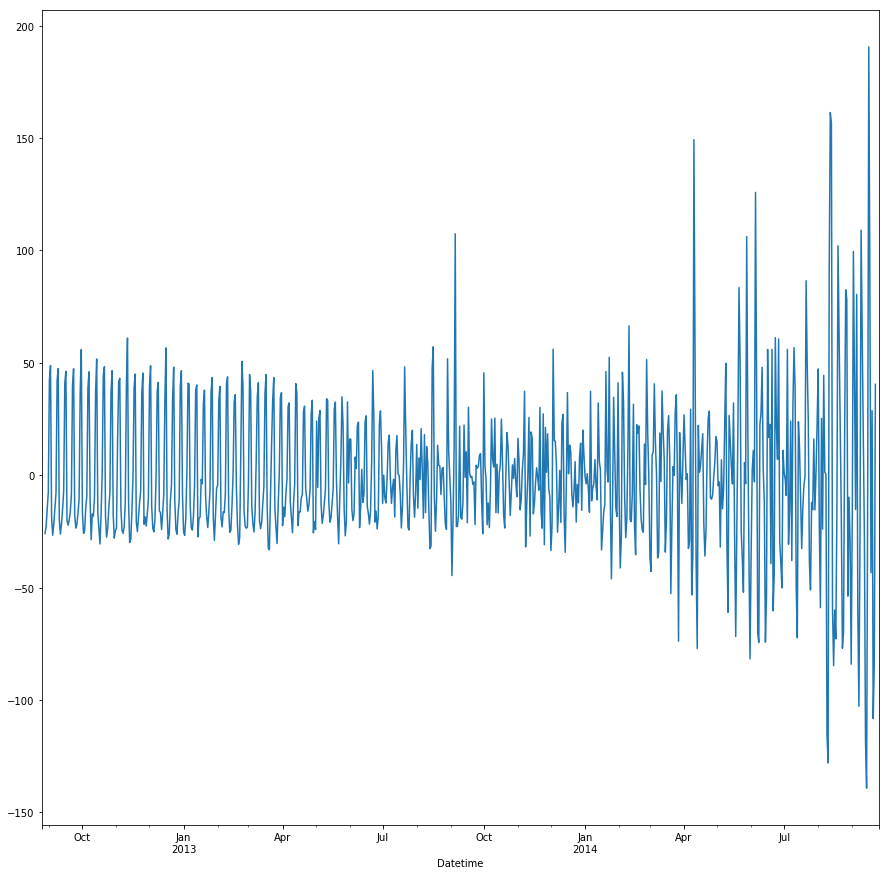

In [107]:
plt.figure(figsize=(15,15))
termse.resid.plot()
plt.show()

In [108]:
import statsmodels.api as sm

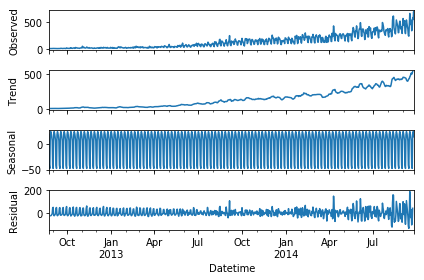

In [109]:
termse.plot()
result=sm.tsa.stattools.adfuller(daily_data.Count)
plt.show()

In [110]:
naive_value=training_data.Count.iloc[-1]

In [111]:
naive_value

372.16666666666669

In [112]:
naive_approach=validation_data.copy()

In [113]:
naive_list=[naive_value for i in range(naive_approach.shape[0])]

In [114]:
naive_list

[372.16666666666669,
 372.16666666666669,
 372.16666666666669,
 372.16666666666669,
 372.16666666666669,
 372.16666666666669,
 372.16666666666669,
 372.16666666666669,
 372.16666666666669,
 372.16666666666669,
 372.16666666666669,
 372.16666666666669,
 372.16666666666669,
 372.16666666666669,
 372.16666666666669,
 372.16666666666669,
 372.16666666666669,
 372.16666666666669,
 372.16666666666669,
 372.16666666666669,
 372.16666666666669,
 372.16666666666669,
 372.16666666666669,
 372.16666666666669,
 372.16666666666669,
 372.16666666666669,
 372.16666666666669,
 372.16666666666669,
 372.16666666666669,
 372.16666666666669,
 372.16666666666669,
 372.16666666666669,
 372.16666666666669,
 372.16666666666669,
 372.16666666666669,
 372.16666666666669,
 372.16666666666669,
 372.16666666666669,
 372.16666666666669,
 372.16666666666669,
 372.16666666666669,
 372.16666666666669,
 372.16666666666669,
 372.16666666666669,
 372.16666666666669,
 372.16666666666669,
 372.16666666666669,
 372.16666666

In [115]:
naive_approach.shape[0]

93

In [116]:
naive_approach['naive']=naive_list

In [117]:
naive_approach.head()

,ID,Count,naive
Datetime,,,
2014-06-25,16067.5,353.666667,372.166667
2014-06-26,16091.5,395.250000,372.166667
2014-06-27,16115.5,282.333333,372.166667
2014-06-28,16139.5,218.250000,372.166667
2014-06-29,16163.5,196.250000,372.166667


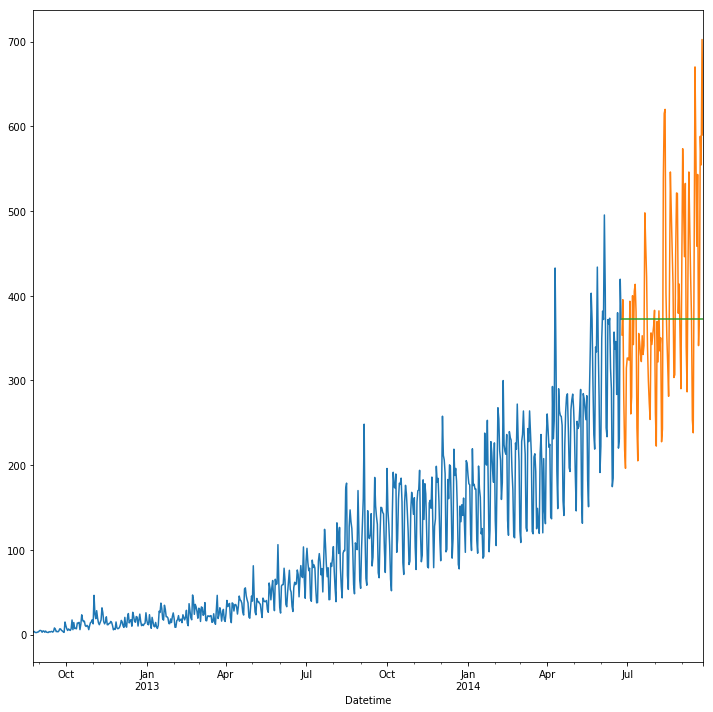

In [118]:
plt.figure(figsize=(12,12))
training_data.Count.plot()
validation_data.Count.plot()
naive_approach.naive.plot()
plt.show()

# Evaluating Naive Approach

In [119]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [120]:
rmse=sqrt(mean_squared_error(naive_approach.naive,validation_data.Count))

In [121]:
rmse

111.79050467496724

# Moving Approach

In [122]:
moving_approach=validation_data.copy()

In [123]:
moving_value=training_data.Count.rolling(30).mean().iloc[-1]

In [124]:
moving_value

321.43333333333345

In [125]:
moving_approach['Moving Approach']=[moving_value for i in range(moving_approach.shape[0])]

In [126]:
moving_approach.head()

,ID,Count,Moving Approach
Datetime,,,
2014-06-25,16067.5,353.666667,321.433333
2014-06-26,16091.5,395.250000,321.433333
2014-06-27,16115.5,282.333333,321.433333
2014-06-28,16139.5,218.250000,321.433333
2014-06-29,16163.5,196.250000,321.433333


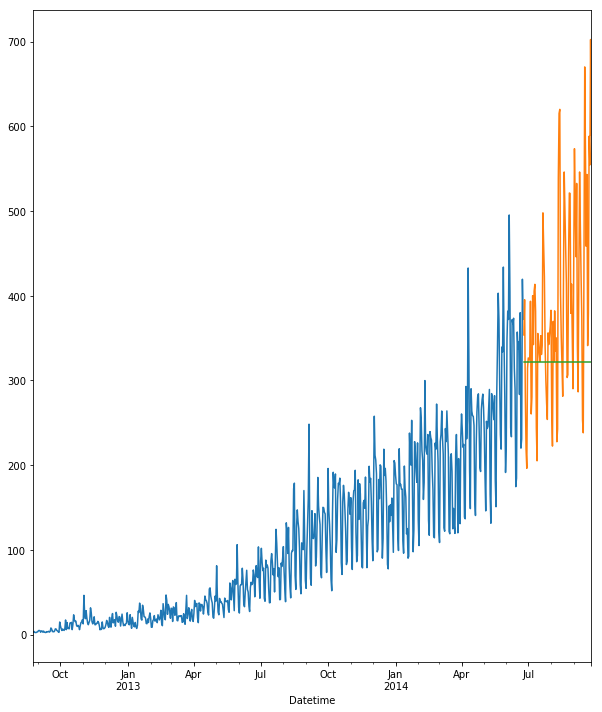

In [127]:
plt.figure(figsize=(10,12))
training_data.Count.plot()
validation_data.Count.plot()
moving_approach['Moving Approach'].plot()
plt.show()

In [128]:
rmse=sqrt(mean_squared_error(moving_approach['Moving Approach'],validation_data.Count))

In [129]:
rmse

129.6495809983456


# Simple Exponential Approach and Holt Approach

In [130]:
from statsmodels.tsa.api import SimpleExpSmoothing, Holt

In [131]:
import numpy as np

In [132]:
ses_approach=validation_data.copy()

In [133]:
ses_data=SimpleExpSmoothing(np.asarray(training_data.Count)).fit(smoothing_level=0.6,optimized=False)
ses_approach['SES']=ses_data.forecast(len(ses_approach))
ses_approach.head()

,ID,Count,SES
Datetime,,,
2014-06-25,16067.5,353.666667,363.522492
2014-06-26,16091.5,395.250000,363.522492
2014-06-27,16115.5,282.333333,363.522492
2014-06-28,16139.5,218.250000,363.522492
2014-06-29,16163.5,196.250000,363.522492


# Smoothing Constant or Level (alpha - α) - 0 < α < 1

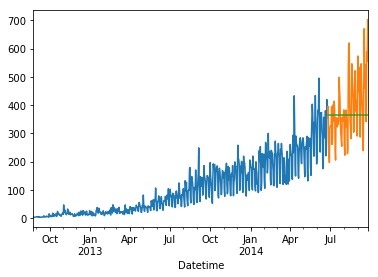

In [134]:
training_data.Count.plot()
validation_data.Count.plot()
ses_approach.SES.plot()
plt.show()

In [135]:
rmse_ses_approach=sqrt(mean_squared_error(validation_data.Count,ses_approach.SES))
rmse_ses_approach

113.43708111884514

# Holt's Linear Trend Model

In [136]:
from IPython.display import Image
Image("Formula-Holt-Linear.png")

In [138]:
holt_approach=validation_data.copy()
holt_data=Holt(np.asarray(training_data.Count)).fit(smoothing_level=0.3,smoothing_slope=0.1)
holt_approach['Holt']=holt_data.forecast(len(validation_data))

In [139]:
holt_approach.Holt.head()

Datetime
2014-06-25    334.650767
2014-06-26    337.159011
2014-06-27    339.667256
2014-06-28    342.175500
2014-06-29    344.683745
Freq: D, Name: Holt, dtype: float64

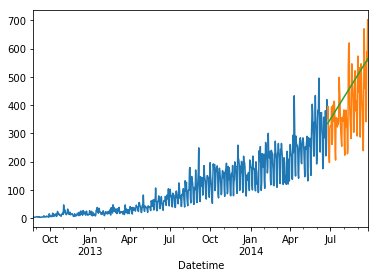

In [140]:
training_data.Count.plot()
validation_data.Count.plot()
holt_approach.Holt.plot()
plt.show()

In [141]:
rmse_holt=sqrt(mean_squared_error(validation_data.Count,holt_approach.Holt))
print(rmse_holt)s

112.94278345314041


# Holt's Winter Model (For seasonality)

# Formula - Level, Trend, Seasonality

In [143]:
from IPython.display import Image
Image("Holts-Winter-Level.png")

In [144]:
from IPython.display import Image
Image("Holts-Winter-Trend.png")

In [145]:
from IPython.display import Image
Image("Holts-Winter-Seasonality.png")

# Calculating Seasonal index

In [146]:
from statsmodels.tsa.api import ExponentialSmoothing

In [147]:
holt_winter_approach=validation_data.copy()

In [149]:
holt_winter_data=ExponentialSmoothing(np.asarray(training_data.Count),seasonal_periods=7,trend='add',seasonal='add').fit()
holt_winter_data_list = holt_winter_data.forecast(len(validation_data))
holt_winter_approach['Winter_Data'] = holt_winter_data_list
holt_winter_approach.Winter_Data.head()

Datetime
2014-06-25    387.359889
2014-06-26    369.136159
2014-06-27    355.562755
2014-06-28    247.090305
2014-06-29    246.193987
Freq: D, Name: Winter_Data, dtype: float64

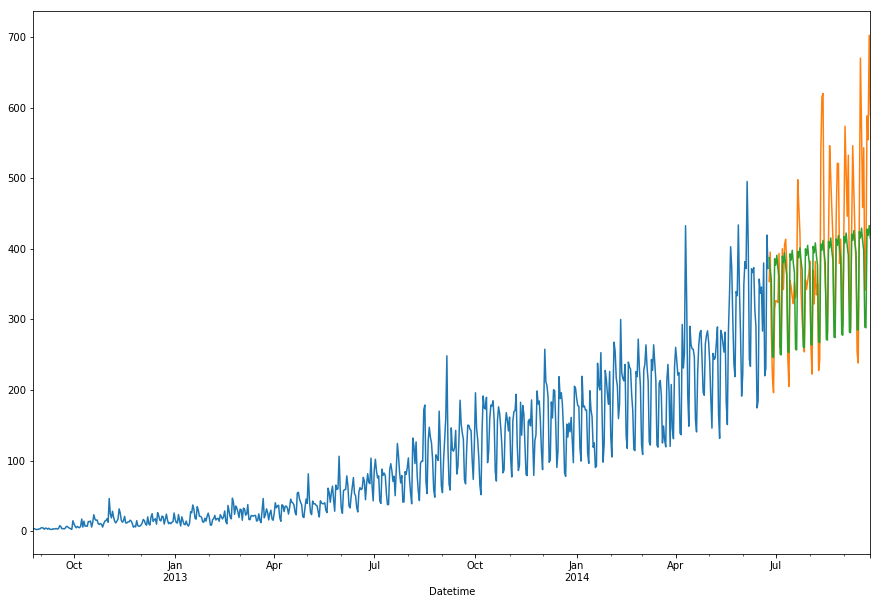

In [150]:
plt.figure(figsize=(15, 10))
training_data.Count.plot()
validation_data.Count.plot()
holt_winter_approach.Winter_Data.plot()
plt.show()

In [151]:
rmse_holt_winter_approach = sqrt(mean_squared_error(validation_data.Count, holt_winter_approach.Winter_Data))
print("Error in holt winter approach is - ", rmse_holt_winter_approach)

Error in holt winter approach is -  82.37467736825413
